In [24]:
'''
MAIN PROMPT: Investigating if the age of a person has a higher chance of 
winning an Oscar or not for each category
'''
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as urllib2
import chardet
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


df = pd.read_csv("oscarnominees.csv", encoding="latin1")
df


,Title,Winner,Award,Year
0,Nomadland,Y,Picture,2020
1,Judas and the Black Messiah,N,Picture,2020
2,Mank,N,Picture,2020
3,Minari,N,Picture,2020
4,Promising Young Woman,N,Picture,2020
5,Sound of Metal,N,Picture,2020
6,The Father,N,Picture,2020
7,The Trial of the Chicago 7,N,Picture,2020
8,Anthony Hopkins,Y,Actor,2020
9,Riz Ahmed,N,Actor,2020


In [25]:
# Drop Picture Category
df = df.drop(df[df["Award"] == "Picture"].index)
df

,Title,Winner,Award,Year
8,Anthony Hopkins,Y,Actor,2020
9,Riz Ahmed,N,Actor,2020
10,Chadwick Boseman,N,Actor,2020
11,Gary Oldman,N,Actor,2020
12,Steven Yeun,N,Actor,2020
13,Frances McDormand,Y,Actress,2020
14,Viola Davis,N,Actress,2020
15,Andra Day,N,Actress,2020
16,Vanessa Kirby,N,Actress,2020
17,Carey Mulligan,N,Actress,2020


In [26]:
print(set(df["Award"]))

{'Supporting Actress', 'Actor', 'Supporting Actor', 'Actress'}


In [27]:
# Loads the page of a URL and downloads it HTML contents to be used
def loadPage(url):
    page = urllib2.urlopen(url)
    data = BeautifulSoup(page, "html.parser")

    return data

In [28]:
# Search for a person given a URL and find info about their DOB
def searchActor(url):
    try:
        # Load HTML page
        data = loadPage(url)

        # Find bday class from <span> element
        spanElement = data.find("span", {"class" : "bday"})

        if spanElement is None:
            # If it can't find the bday class, the birthday is in the <p> element 
            spanElement = data.find_all("p")[1]
        
        if "Nick_Nolte" in url:
            # Get birth year
            birthYear = int(spanElement.text[38:42])

        else:
            birthYear = int(spanElement.text[:4])

    except ValueError as e:
        # Value error incase it doesn't give a numerical age
        return "None"

    return birthYear

bestActorData = loadPage("https://en.wikipedia.org/wiki/Academy_Award_for_Best_Actor")
def findActor(name, year):
    # Decode name as name contains special characters that are corrupt in the dataset
    name = name.encode("iso-8859-1").decode("utf-8")

    # Find the "Winners and nominees" table in wikipedia HTML
    tables = bestActorData.find_all("table", {"class": "wikitable"})

    for table in tables:
        # Loop through all elements with <tr> element
        tableRows = table.find_all("tr")

        for tableRow in tableRows:
            # Loop through all elements with <td> element
            tableCells = tableRow.find_all("td")

            for tableCell in tableCells:
                # Find all <a> elements as they contain hrefs to the person's wikipedia
                aElement = tableCell.find("a", href=True)
                
                # Check if name exists in <a> element as they contain the person's name in the link
                if aElement is not None and name in aElement:
                    # Search for actor's age from wikipedia link
                    birthYear = searchActor("https://en.wikipedia.org" + aElement.get("href"))
                    
                    print(name, ":", year - birthYear)
                    # Return age
                    return year - birthYear

    print(name, ":", "Fail!")
    return 1


actors = df.loc[df["Award"] == "Actor"]
actors["Age"] = actors.apply(lambda r: findActor(r["Title"], r["Year"]), axis=1)


Peter O'Toole : 36
Rod Steiger : 42
Warren Beatty : 30
Dustin Hoffman : 30
Paul Newman : 42
Spencer Tracy : 67
Paul Scofield : 44
Alan Arkin : 32
Richard Burton : 41
Michael Caine : 33
Steve McQueen : 36
Lee Marvin : 41
Richard Burton : 40
Laurence Olivier : 58
Rod Steiger : 40
Oskar Werner : 43
Rex Harrison : 56
Richard Burton : 39
Peter O'Toole : 32
Anthony Quinn : 49
Peter Sellers : 39
Sidney Poitier : 36
Albert Finney : 27
Richard Harris : 33
Rex Harrison : 55
Paul Newman : 38
Gregory Peck : 46
Burt Lancaster : 49
Jack Lemmon : 37
Marcello Mastroianni : 38
Peter O'Toole : 30
Maximilian Schell : 31
Charles Boyer : 62
Paul Newman : 36
Spencer Tracy : 61
Stuart Whitman : 33
Burt Lancaster : 47
Trevor Howard : 47
Jack Lemmon : 35
Laurence Olivier : 53
Spencer Tracy : 60
Charlton Heston : 36
Laurence Harvey : 31
Jack Lemmon : 34
Paul Muni : 64
James Stewart : 51
David Niven : 48
Tony Curtis : 33
Paul Newman : 33
Sidney Poitier : 31
Spencer Tracy : 58
Alec Guinness : 43
Marlon Brando : 3

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\3645534579.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors["Age"] = actors.apply(lambda r: findActor(r["Title"], r["Year"]), axis=1)


Anthony Hopkins : 83
Riz Ahmed : 38
Chadwick Boseman : 44
Gary Oldman : 62
Steven Yeun : 37
Joaquin Phoenix : 45
Leonardo DiCaprio : 45
Adam Driver : 36
Antonio Banderas : 59
Jonathan Pryce : 72
Rami Malek : 37
Christian Bale : 44
Bradley Cooper : 43
Willem Dafoe : 63
Viggo Mortensen : 60
Gary Oldman : 59
Timothée Chalamet : 22
Daniel Day-Lewis : 60
Daniel Kaluuya : 28
Denzel Washington : 63
Casey Affleck : 41
Andrew Garfield : 33
Ryan Gosling : 36
Viggo Mortensen : 58
Denzel Washington : 62
Leonardo DiCaprio : 41
Bryan Cranston : 59
Matt Damon : 45
Michael Fassbender : 38
Eddie Redmayne : 33
Eddie Redmayne : 32
Benedict Cumberbatch : 38
Bradley Cooper : 39
Michael Keaton : 63
Steve Carell : 52
Matthew McConaughey : 44
Christian Bale : 39
Bruce Dern : 77
Leonardo DiCaprio : 39
Chiwetel Ejiofor : 36
Bradley Cooper : 37
Daniel Day-Lewis : 55
Hugh Jackman : 44
Joaquin Phoenix : 38
Denzel Washington : 58
Jean Dujardin : 39
Demián Bichir : 48
George Clooney : 50
Gary Oldman : 53
Brad Pitt :

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\3645534579.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors["Age"] = actors.apply(lambda r: findActor(r["Title"], r["Year"]), axis=1)


In [29]:
def searchActress(url):
    try:
        data = loadPage(url)

        spanElement = data.find("span", {"class": "bday"})

        if spanElement is None:
            spanElement = data.find_all("div", {"class" : "shortdescription nomobile noexcerpt noprint searchaux"})[0]

        if "Rosamund_Pike" in url:
            birthYear = int(spanElement.text[-5:-1])

        elif "Grace_Moore" in url or "Joan_Crawford" in url:
            birthYear = int(spanElement.text[-10:-6])

        else:
            birthYear = int(spanElement.text[:4])
        
        return birthYear
    except ValueError as e:
        return "None"


bestActressData = loadPage("https://en.wikipedia.org/wiki/Academy_Award_for_Best_Actress")
def findActress(name, year):
    name = name.encode("iso-8859-1").decode("utf-8")

    # Find the "Winners and nominees" table
    tables = bestActressData.find_all("table", {"class" : "wikitable"})

    for table in tables:
        tableRows = table.find_all("tr")

        for tableRow in tableRows:
            tableCells = tableRow.find_all("td")

            for tableCell in tableCells:
                aElement = tableCell.find("a", href=True)

                if aElement is not None and name in aElement.text:
                    birthYear = searchActress("https://en.wikipedia.org" + aElement.get("href"))

                    # In case a person's birth year can't be found, we return "None" to be dropped later
                    if birthYear != "None":
                        print(name, ":", year - birthYear)
                        return year - birthYear
                    
                    return birthYear

    print(name, ":", "Fail!")
    return 1

actress = df.loc[df["Award"] == "Actress"]
actress["Age"] = actress.apply(lambda r: findActress(r["Title"], r["Year"]), axis=1)

Frances McDormand : 63
Viola Davis : 55
Andra Day : 36
Vanessa Kirby : 32
Carey Mulligan : 35
Renée Zellweger : 50
Cynthia Erivo : 32
Scarlett Johansson : 35
Saoirse Ronan : 25
Charlize Theron : 44
Olivia Colman : 44
Yalitza Aparicio : 25
Glenn Close : 71
Lady Gaga : 32
Melissa McCarthy : 48
Frances McDormand : 60
Sally Hawkins : 41
Margot Robbie : 27
Saoirse Ronan : 23
Meryl Streep : 68
Emma Stone : 28
Isabelle Huppert : 63
Ruth Negga : 35
Natalie Portman : 35
Meryl Streep : 67
Brie Larson : 26
Cate Blanchett : 46
Jennifer Lawrence : 25
Charlotte Rampling : 69
Saoirse Ronan : 21
Julianne Moore : 54
Felicity Jones : 31
Marion Cotillard : 39
Reese Witherspoon : 38
Rosamund Pike : 35
Cate Blanchett : 44
Amy Adams : 39
Sandra Bullock : 49
Judi Dench : 79
Meryl Streep : 64
Jessica Chastain : 35
Jennifer Lawrence : 22
Emmanuelle Riva : 85
Quvenzhané Wallis : 9
Naomi Watts : 44
Meryl Streep : 62
Glenn Close : 64
Viola Davis : 46
Rooney Mara : 26
Michelle Williams : 31
Natalie Portman : 29
An

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\1493778438.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actress["Age"] = actress.apply(lambda r: findActress(r["Title"], r["Year"]), axis=1)


Frances McDormand : 63
Viola Davis : 55
Andra Day : 36
Vanessa Kirby : 32
Carey Mulligan : 35
Renée Zellweger : 50
Cynthia Erivo : 32
Scarlett Johansson : 35
Saoirse Ronan : 25
Charlize Theron : 44
Olivia Colman : 44
Yalitza Aparicio : 25
Glenn Close : 71
Lady Gaga : 32
Melissa McCarthy : 48
Frances McDormand : 60
Sally Hawkins : 41
Margot Robbie : 27
Saoirse Ronan : 23
Meryl Streep : 68
Emma Stone : 28
Isabelle Huppert : 63
Ruth Negga : 35
Natalie Portman : 35
Meryl Streep : 67
Brie Larson : 26
Cate Blanchett : 46
Jennifer Lawrence : 25
Charlotte Rampling : 69
Saoirse Ronan : 21
Julianne Moore : 54
Felicity Jones : 31
Marion Cotillard : 39
Reese Witherspoon : 38
Rosamund Pike : 35
Cate Blanchett : 44
Amy Adams : 39
Sandra Bullock : 49
Judi Dench : 79
Meryl Streep : 64
Jessica Chastain : 35
Jennifer Lawrence : 22
Emmanuelle Riva : 85
Quvenzhané Wallis : 9
Naomi Watts : 44
Meryl Streep : 62
Glenn Close : 64
Viola Davis : 46
Rooney Mara : 26
Michelle Williams : 31
Natalie Portman : 29
An

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\1493778438.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actress["Age"] = actress.apply(lambda r: findActress(r["Title"], r["Year"]), axis=1)


In [30]:
bestSupportingActorData = loadPage("https://en.wikipedia.org/wiki/Academy_Award_for_Best_Supporting_Actor")

def searchSupportingActor(url):
    try:
        data = loadPage(url)

        spanElement = data.find("span", {"class" : "bday"})

        if spanElement is None:
            spanElement = data.find_all("p")

        if "Ralph_Richardson" in url:
            birthYear = int(spanElement[2].text[40:44])

        elif "John_Gielgud" in url:
            birthYear = int(spanElement[5].text[29:33])

        elif "Stanley_Holloway" in url:
            birthYear = int(spanElement[1].text[41:45])
            
        elif "Nick_Nolte" in url:
            spanElement = data.find_all("p")[1].text
            birthYear = int(spanElement[38:42])
            
        else:
            birthYear = int(spanElement.text[:4])
        
        return birthYear
    
    except ValueError as e:
        return "None"


def findSupportingActor(name, year):
    name = name.encode("iso-8859-1").decode("utf-8")

    # Find the "Winners and nominees" table
    tables = bestSupportingActorData.find_all("table", {"class" : "wikitable"})

    for table in tables:
        tableRows = table.find_all("tr")

        for tableRow in tableRows:
            tableCells = tableRow.find_all("td")

            for tableCell in tableCells:
                aElement = tableCell.find("a", href=True)

                if aElement is not None and name in aElement.text:
                    birthYear = searchSupportingActor("https://en.wikipedia.org" + aElement.get("href"))

                    if birthYear != "None":
                        print(name, ":", year - birthYear)
                        return year - birthYear
                    
                    return birthYear

    print(name, ":", "Fail!")
    return 1

bestSupportingActor = df.loc[df["Award"] == "Supporting Actor"]
bestSupportingActor["Age"] = bestSupportingActor.apply(lambda r: findSupportingActor(r["Title"], r["Year"]), axis=1)

Daniel Kaluuya : 31
Sacha Baron Cohen : 49
Leslie Odom Jr. : 39
Paul Raci : 72
LaKeith Stanfield : 29
Brad Pitt : 56
Tom Hanks : 63
Anthony Hopkins : 82
Al Pacino : 79
Joe Pesci : 76
Mahershala Ali : 44
Adam Driver : 35
Sam Elliott : 74
Richard E. Grant : 61
Sam Rockwell : 50
Sam Rockwell : 49
Willem Dafoe : 62
Woody Harrelson : 56
Richard Jenkins : 70
Christopher Plummer : 88
Mahershala Ali : 42
Jeff Bridges : 67
Lucas Hedges : 20
Dev Patel : 26
Michael Shannon : 42
Mark Rylance : 55
Christian Bale : 41
Tom Hardy : 38
Mark Ruffalo : 48
Sylvester Stallone : 69
J. K. Simmons : 59
Edward Norton : 45
Ethan Hawke : 44
Mark Ruffalo : 47
Robert Duvall : 83
Jared Leto : 42
Barkhad Abdi : 28
Bradley Cooper : 38
Michael Fassbender : 36
Jonah Hill : 30
Alan Arkin : 78
Robert De Niro : 69
Philip Seymour Hoffman : 45
Tommy Lee Jones : 66
Christoph Waltz : 56
Christopher Plummer : 82
Kenneth Branagh : 51
Jonah Hill : 28
Nick Nolte : 70
Max von Sydow : 82
Christian Bale : 36
John Hawkes : 51
Jeremy 

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\4184524562.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestSupportingActor["Age"] = bestSupportingActor.apply(lambda r: findSupportingActor(r["Title"], r["Year"]), axis=1)


Daniel Kaluuya : 31
Sacha Baron Cohen : 49
Leslie Odom Jr. : 39
Paul Raci : 72
LaKeith Stanfield : 29
Brad Pitt : 56
Tom Hanks : 63
Anthony Hopkins : 82
Al Pacino : 79
Joe Pesci : 76
Mahershala Ali : 44
Adam Driver : 35
Sam Elliott : 74
Richard E. Grant : 61
Sam Rockwell : 50
Sam Rockwell : 49
Willem Dafoe : 62
Woody Harrelson : 56
Richard Jenkins : 70
Christopher Plummer : 88
Mahershala Ali : 42
Jeff Bridges : 67
Lucas Hedges : 20
Dev Patel : 26
Michael Shannon : 42
Mark Rylance : 55
Christian Bale : 41
Tom Hardy : 38
Mark Ruffalo : 48
Sylvester Stallone : 69
J. K. Simmons : 59
Edward Norton : 45
Ethan Hawke : 44
Mark Ruffalo : 47
Robert Duvall : 83
Jared Leto : 42
Barkhad Abdi : 28
Bradley Cooper : 38
Michael Fassbender : 36
Jonah Hill : 30
Alan Arkin : 78
Robert De Niro : 69
Philip Seymour Hoffman : 45
Tommy Lee Jones : 66
Christoph Waltz : 56
Christopher Plummer : 82
Kenneth Branagh : 51
Jonah Hill : 28
Nick Nolte : 70
Max von Sydow : 82
Christian Bale : 36
John Hawkes : 51
Jeremy 

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\4184524562.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestSupportingActor["Age"] = bestSupportingActor.apply(lambda r: findSupportingActor(r["Title"], r["Year"]), axis=1)


In [31]:
bestSupportingActressData = loadPage("https://en.wikipedia.org/wiki/Academy_Award_for_Best_Supporting_Actress")

def searchSupportingActress(url):
    try:
        data = loadPage(url)
        spanElement = data.find("span", {"class" : "bday"})

        if spanElement is None:
            spanElement = data.find_all("p")

        if "Rachel_Griffiths" in url:
            birthYear = int(spanElement[1].text[34:38])
        
        elif "Katina_Paxinou" in url:
            birthYear = int(spanElement[0].text[51:55])

        else:
            birthYear = int(spanElement.text[:4])
        
        return birthYear
    except AttributeError as e:
        return "None"
    

def findSupportingActress(name, year):
    name = name.encode("iso-8859-1").decode("utf-8")

    # Find the "Winners and nominees" table
    tables = bestSupportingActressData.find_all("table", {"class" : "wikitable"})

    for table in tables:
        tableRows = table.find_all("tr")

        for tableRow in tableRows:
            tableCells = tableRow.find_all("td")

            for tableCell in tableCells:
                aElement = tableCell.find("a", href=True)

                if aElement is not None and name in aElement.text:
                    birthYear = searchSupportingActress("https://en.wikipedia.org" + aElement.get("href"))

                    if birthYear != "None":
                        print(name, ":", year - birthYear)
                        return year - birthYear
                    
                    return birthYear

    print(name, ":", "Fail!")
    return 1
bestSupportingActress = df.loc[df["Award"] == "Supporting Actress"]
bestSupportingActress["Age"] = bestSupportingActress.apply(lambda r: findSupportingActress(r["Title"], r["Year"]), axis=1)

Youn Yuh-jung : 73
Maria Bakalova : 24
Glenn Close : 73
Olivia Colman : 46
Amanda Seyfried : 35
Laura Dern : 52
Kathy Bates : 71
Scarlett Johansson : 35
Florence Pugh : 23
Margot Robbie : 29
Regina King : 47
Amy Adams : 44
Marina de Tavira : 44
Emma Stone : 30
Rachel Weisz : 48
Allison Janney : 58
Mary J. Blige : 46
Lesley Manville : 61
Laurie Metcalf : 62
Octavia Spencer : 47
Viola Davis : 51
Naomie Harris : 40
Nicole Kidman : 49
Octavia Spencer : 46
Michelle Williams : 36
Alicia Vikander : 27
Jennifer Jason Leigh : 53
Rooney Mara : 30
Rachel McAdams : 37
Kate Winslet : 40
Patricia Arquette : 46
Emma Stone : 26
Keira Knightley : 29
Laura Dern : 47
Meryl Streep : 65
Lupita Nyong'o : 30
Sally Hawkins : 37
Jennifer Lawrence : 23
Julia Roberts : 46
June Squibb : 84
Amy Adams : 38
Sally Field : 66
Anne Hathaway : 30
Helen Hunt : 49
Jacki Weaver : 65
Octavia Spencer : 41
Bérénice Bejo : 35
Jessica Chastain : 34
Melissa McCarthy : 41
Janet McTeer : 50
Melissa Leo : 50
Amy Adams : 36
Helena B

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\4247196407.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestSupportingActress["Age"] = bestSupportingActress.apply(lambda r: findSupportingActress(r["Title"], r["Year"]), axis=1)


Youn Yuh-jung : 73
Maria Bakalova : 24
Glenn Close : 73
Olivia Colman : 46
Amanda Seyfried : 35
Laura Dern : 52
Kathy Bates : 71
Scarlett Johansson : 35
Florence Pugh : 23
Margot Robbie : 29
Regina King : 47
Amy Adams : 44
Marina de Tavira : 44
Emma Stone : 30
Rachel Weisz : 48
Allison Janney : 58
Mary J. Blige : 46
Lesley Manville : 61
Laurie Metcalf : 62
Octavia Spencer : 47
Viola Davis : 51
Naomie Harris : 40
Nicole Kidman : 49
Octavia Spencer : 46
Michelle Williams : 36
Alicia Vikander : 27
Jennifer Jason Leigh : 53
Rooney Mara : 30
Rachel McAdams : 37
Kate Winslet : 40
Patricia Arquette : 46
Emma Stone : 26
Keira Knightley : 29
Laura Dern : 47
Meryl Streep : 65
Lupita Nyong'o : 30
Sally Hawkins : 37
Jennifer Lawrence : 23
Julia Roberts : 46
June Squibb : 84
Amy Adams : 38
Sally Field : 66
Anne Hathaway : 30
Helen Hunt : 49
Jacki Weaver : 65
Octavia Spencer : 41
Bérénice Bejo : 35
Jessica Chastain : 34
Melissa McCarthy : 41
Janet McTeer : 50
Melissa Leo : 50
Amy Adams : 36
Helena B

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\4247196407.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bestSupportingActress["Age"] = bestSupportingActress.apply(lambda r: findSupportingActress(r["Title"], r["Year"]), axis=1)


In [32]:
# Add in age column
df["Age"] = "None"

# Merge temporary datasets to actual dataset
df.loc[df["Award"] == "Actor"] = actors
df.loc[df["Award"] == "Actress"] = actress
df.loc[df["Award"] == "Supporting Actor"] = bestSupportingActor
df.loc[df["Award"] == "Supporting Actress"] = bestSupportingActress

pd.set_option("display.max_rows", None)

# Drop all ages with "None" as their age can't be determined
df = df.drop(df[df["Age"] == "None"].index)

df

,Title,Winner,Award,Year,Age
8,Anthony Hopkins,Y,Actor,2020,83
9,Riz Ahmed,N,Actor,2020,38
10,Chadwick Boseman,N,Actor,2020,44
11,Gary Oldman,N,Actor,2020,62
12,Steven Yeun,N,Actor,2020,37
13,Frances McDormand,Y,Actress,2020,63
14,Viola Davis,N,Actress,2020,55
15,Andra Day,N,Actress,2020,36
16,Vanessa Kirby,N,Actress,2020,32
17,Carey Mulligan,N,Actress,2020,35


,Title,Winner,Award,Year,Age
8,Anthony Hopkins,Y,Actor,2020,83
9,Riz Ahmed,N,Actor,2020,38
10,Chadwick Boseman,N,Actor,2020,44
11,Gary Oldman,N,Actor,2020,62
12,Steven Yeun,N,Actor,2020,37
13,Frances McDormand,Y,Actress,2020,63
14,Viola Davis,N,Actress,2020,55
15,Andra Day,N,Actress,2020,36
16,Vanessa Kirby,N,Actress,2020,32
17,Carey Mulligan,N,Actress,2020,35


In [33]:
# For Role actor = 0, actress = 1, supporting actor = 2, supporting actress = 3
df['Award'] = df['Award'].replace(['Actor', 'Actress', 'Supporting Actor', 'Supporting Actress'],
                                [0, 1, 2, 3])
# For Winner Y = 1, N = 0
df['Winner'] = df['Winner'].replace(['Y', 'N'], [1, 0])

# Remove Names and Years Won
df = df.drop('Title', axis=1)
df = df.drop('Year', axis=1)

# Change Age values back to ints
df['Age'] = df['Age'].astype(int)

columns_titles = ["Age","Award", "Winner"]
df=df.reindex(columns=columns_titles)
df

# Compare Age/Award to Winner Status
X = df.iloc[:, 0:2].values
y = df["Winner"].values

X

array([[83,  0],
       [38,  0],
       [44,  0],
       ...,
       [22,  1],
       [22,  1],
       [29,  1]], dtype=int64)

array([[83,  0],
       [38,  0],
       [44,  0],
       ...,
       [22,  1],
       [22,  1],
       [29,  1]], dtype=int64)

In [34]:
df

,Age,Award,Winner
8,83,0,1
9,38,0,0
10,44,0,0
11,62,0,0
12,37,0,0
13,63,1,1
14,55,1,0
15,36,1,0
16,32,1,0
17,35,1,0


,Age,Award,Winner
8,83,0,1
9,38,0,0
10,44,0,0
11,62,0,0
12,37,0,0
13,63,1,1
14,55,1,0
15,36,1,0
16,32,1,0
17,35,1,0


In [35]:
# FEATURE SCALING
# import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler


# create instances of StandardScaler
sc = StandardScaler()

# transform X using fit_transform method of sc
X = sc.fit_transform(X)

In [36]:
# Split X, y into X_train, X_test, y_train, y_test with 7.5:2.5 ratio
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
# Build a Logistic Regression model on the Training Set
# import
from sklearn.linear_model import LogisticRegression

# fit

clf = LogisticRegression(random_state=0).fit(X,y)

In [38]:
# Predict the test set results y_pred (y_hat) from X_test

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
# Compute Confussion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [40]:
import matplotlib.pyplot as plt

# Display Confusion Matrix
disp = cm

plt.show()

In [41]:
from sklearn.metrics import accuracy_score, average_precision_score, recall_score, f1_score
# Import metrics from sklearn
import sklearn.metrics
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print('Accuracy = ', acc)
# Precision Score
prec = average_precision_score(y_test, y_pred)
print('Precision = ', prec)
# Recall Score
recall = recall_score(y_test, y_pred)
print('Recall = ', recall)
# F1 Score
f1 = f1_score(y_test, y_pred)
print('F1_Score = ', f1)


Accuracy =  0.8227272727272728
Precision =  0.17727272727272728
Recall =  0.0
F1_Score =  0.0
Accuracy =  0.7931818181818182
Precision =  0.20681818181818182
Recall =  0.0
F1_Score =  0.0


In [42]:
# Predict if one outcome will happen
# Predict y_hat for Age=30,	role = 0
y_pred = clf.predict([[30, 0]])
y_pred

array([1], dtype=int64)

array([1], dtype=int64)

In [43]:
df

,Age,Award,Winner
8,83,0,1
9,38,0,0
10,44,0,0
11,62,0,0
12,37,0,0
13,63,1,1
14,55,1,0
15,36,1,0
16,32,1,0
17,35,1,0


,Age,Award,Winner
8,83,0,1
9,38,0,0
10,44,0,0
11,62,0,0
12,37,0,0
13,63,1,1
14,55,1,0
15,36,1,0
16,32,1,0
17,35,1,0


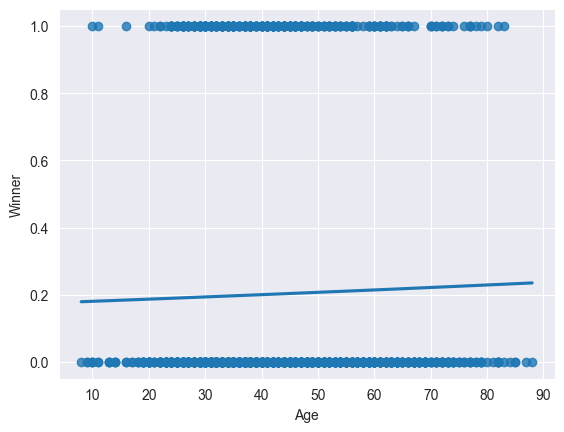

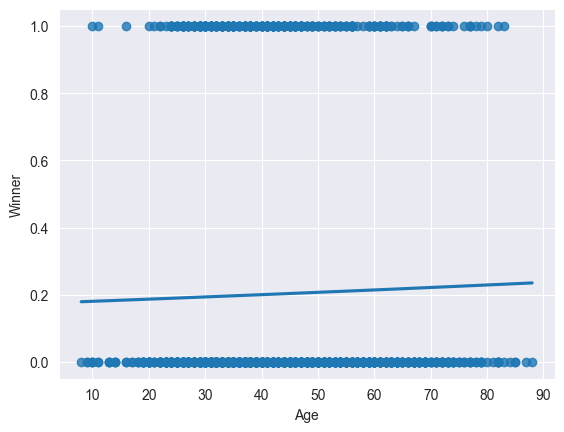

In [44]:
# Visualise the Logistic Regression on the whole dataset
# (i.e., only 1 feature: 'Age', with y = "Winner")
import seaborn as sns

logRegGraph = sns.regplot(x=df['Age'], y=df['Winner'], data=df, logistic=True, ci=None)


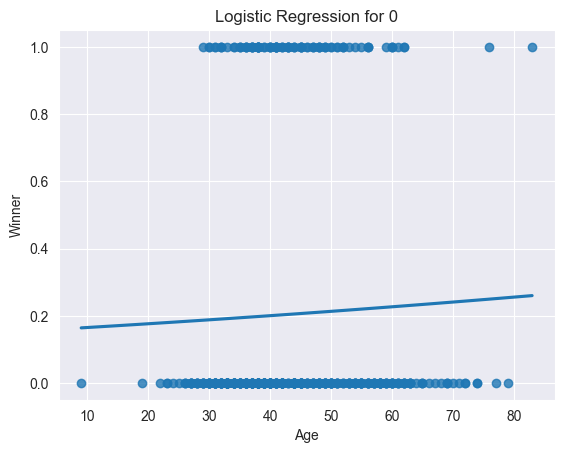

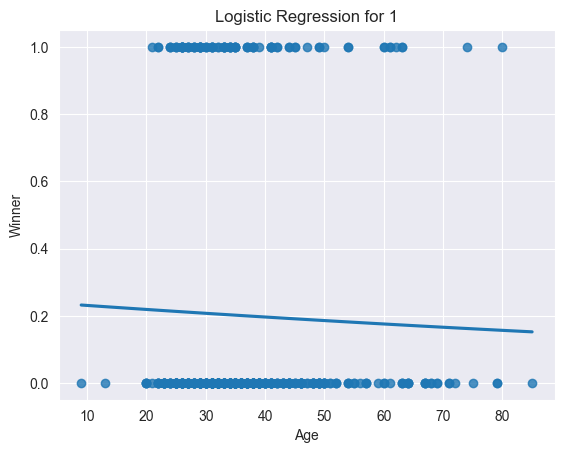

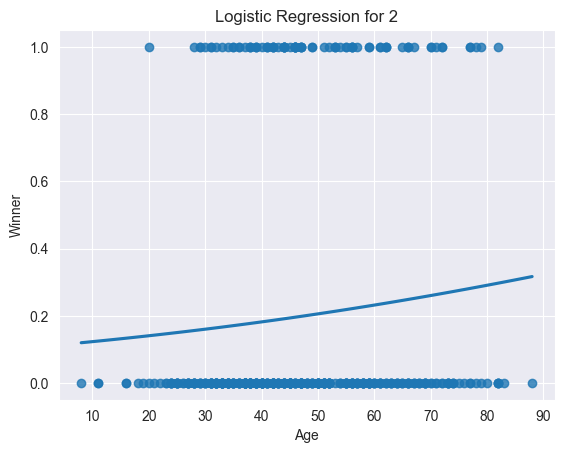

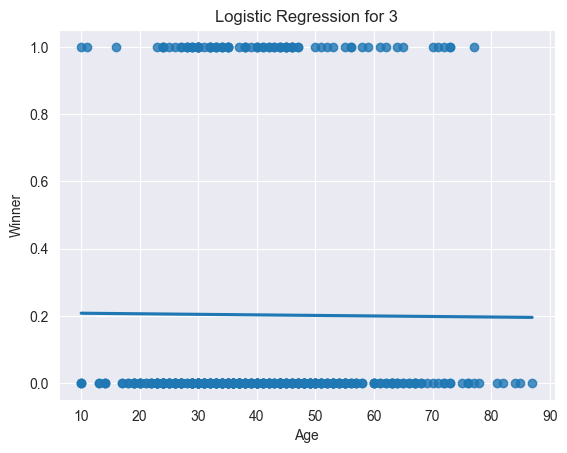

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by the "Award" column
groups = df.groupby('Award')

# Create the logistic graphs for the groups
for name, group in groups:
    logRegGraph = sns.regplot(x=group['Age'], y=group['Winner'], data=group, logistic=True, ci=None)
    plt.title(f"Logistic Regression for {name}")
    plt.show()


In [45]:
import numpy as np

# Create the feature matrix X and target vector y
X = df['Age'].values.reshape(-1, 1)
y = df['Winner']

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Find each age bracket's probability of winning an oscar vs being nominated.
max_prob_age = None
max_prob = 0.0
for age in range(9, 81):
    prob = model.predict_proba([[age]])[0][1]
    if age%10 == 0:
        print(f"Age:{age}, Prob: {prob:.2f}%")
    if prob > max_prob:
        max_prob = prob
        max_prob_age = age

# Print the age with the highest probability of winning an Oscar
print(f"The age with the highest probability of winning an Oscar is {max_prob_age} years, with a probability of {max_prob:.2f}.")

Age:10, Prob: 0.18%
Age:20, Prob: 0.19%
Age:30, Prob: 0.19%
Age:40, Prob: 0.20%
Age:50, Prob: 0.21%
Age:60, Prob: 0.21%
Age:70, Prob: 0.22%
Age:80, Prob: 0.23%
The age with the highest probability of winning an Oscar is 80 years, with a probability of 0.23.
Age:10, Prob: 0.18%
Age:20, Prob: 0.19%
Age:30, Prob: 0.19%
Age:40, Prob: 0.20%
Age:50, Prob: 0.21%
Age:60, Prob: 0.21%
Age:70, Prob: 0.22%
Age:80, Prob: 0.23%
The age with the highest probability of winning an Oscar is 80 years, with a probability of 0.23.


In [52]:

def find_max_prob_age(df, award):
    # Filter the data for the given award category
    filtered_data = df[df['Award'] == award]

    # Create the feature matrix X and target vector y
    X = filtered_data['Age'].values.reshape(-1, 1) # reshape to 2D array
    y = filtered_data['Winner']

    # Fit a logistic regression model
    model = LogisticRegression()
    model.fit(X, y)

    # Find the age with the highest probability of winning an Oscar
    max_prob_age = None
    max_prob = 0.0
    for Age in range(20, 81):
        prob = model.predict_proba([[Age]])[0][1]
        if age%10 == 0:
            print(f"Age:{age}, Prob: {prob:.2f}%")
        if prob > max_prob:
            max_prob = prob
            max_prob_age = Age

    # Return the age with the highest probability of winning an Oscar for the given award category
    return max_prob_age, max_prob

# Find the age with the highest probability of winning an Oscar for each award category
for Award in range(4):
    max_prob_age, max_prob = find_max_prob_age(df, Award)
    print(f"The age with the highest probability of winning an Oscar for award category {Award} is {max_prob_age} years, with a probability of {max_prob:.2f}.")


Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.18%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.19%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.20%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.21%
Age:80, Prob: 0.22%
Age:80, Prob: 0.22%
Age:80, Prob: 0.22%
Age:80, Prob: 0.22%
Age:80, Prob: 0.22%
Age:80, Prob: 0.22%
Age:80, Prob: 0.22%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.23%
Age:80, Prob: 0.24%
Age:80, Prob: 0.24%
Age:80, Prob: 0.24%


C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\2587215147.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


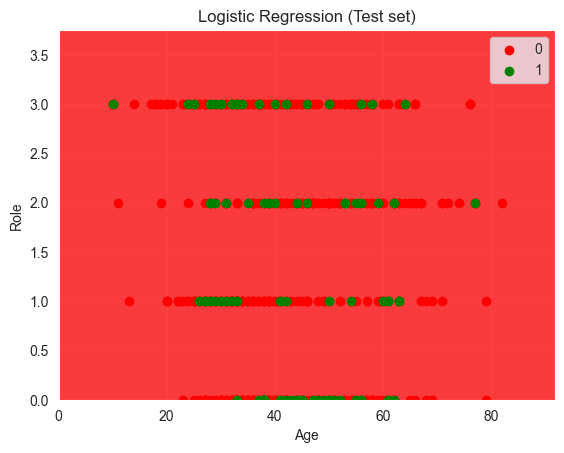

C:\Users\Travis Guffey\AppData\Local\Temp\ipykernel_34620\2587215147.py:44: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


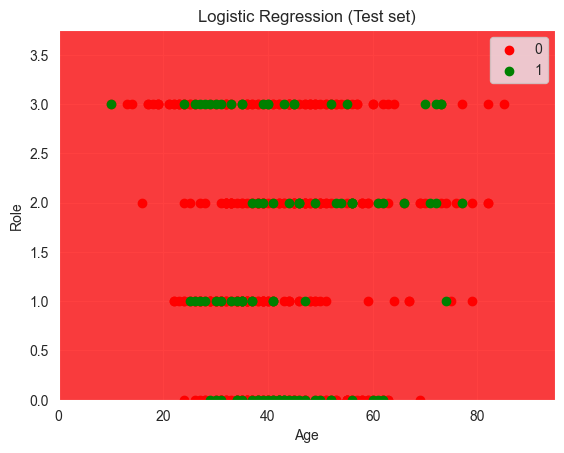

In [46]:
# Visualise the Decision Surface on Test set results
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

# Define bounds of the domain
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10
min2, max2 = X_set[:, 1].min() - 0, X_set[:, 1].max() + 1

# Define the x and y scale
# step = 0.25 means all the pixels were actually with a 0.25 resolution
x1_grid = np.arange(min1, max1, 0.25)
x2_grid = np.arange(min2, max2, 0.25)

# Create the grid
# step=0.25 means all the pixels were actually with a 0.25 resolution
X1, X2 = np.meshgrid(x1_grid, x2_grid)

# Flatten each grid to a vector
r1, r2 = X1.flatten(), X2.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# Horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# Make predictions for the grid
y_hat = clf.predict(sc.transform(grid))

# Reshape the predictions back into a grid
y_hat = y_hat.reshape(X1.shape)

# Plot the grid of X1, X2 and y_hat values as a surface
# (This is the line applying the classifier on all the pixel observation points,
# it colors all the red pixel points and the green pixel points,
# make the contour between red and green regions)
plt.contourf(X1, X2, y_hat, alpha = 0.75, cmap=ListedColormap(('red', 'green')))

# Plot the limits of the Age and the Estimated Salary lines
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plots all the data points that are the real values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Role')
plt.legend()
plt.show()